In [32]:
from mylib import read_stats, plot_confidence_interval
import matplotlib.pyplot as plt
import numpy as np

In [33]:
BASE_DIR = "../simulations/results/"
# **.spawner.tl = exponential(${6..22 step 2}min)
# **.spawner.to = exponential(${6..22 step 2}min)
# **.spawner.tp = exponential(120min)
# **.spawner.tn = exponential(30min)
TL = range(6, 23, 2)
TO = range(6, 23, 2)
tn = 30
REP = range(10)

stats = read_stats(BASE_DIR + "Rho1Rho2-{},{}-#{}.sca.csv", TL, TO, REP)
stats.keys()

dict_keys(['landQueueLen', 'landQueueTime', 'numParked', 'toffQueueLen', 'toffQueueTime'])

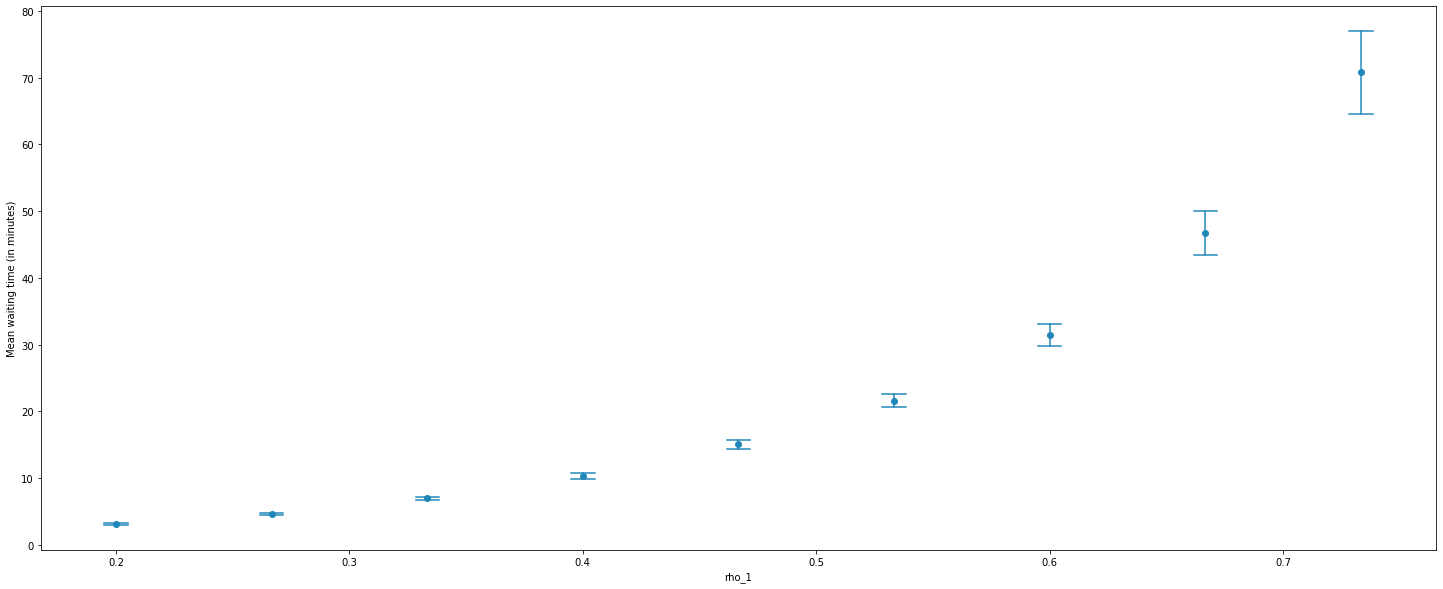

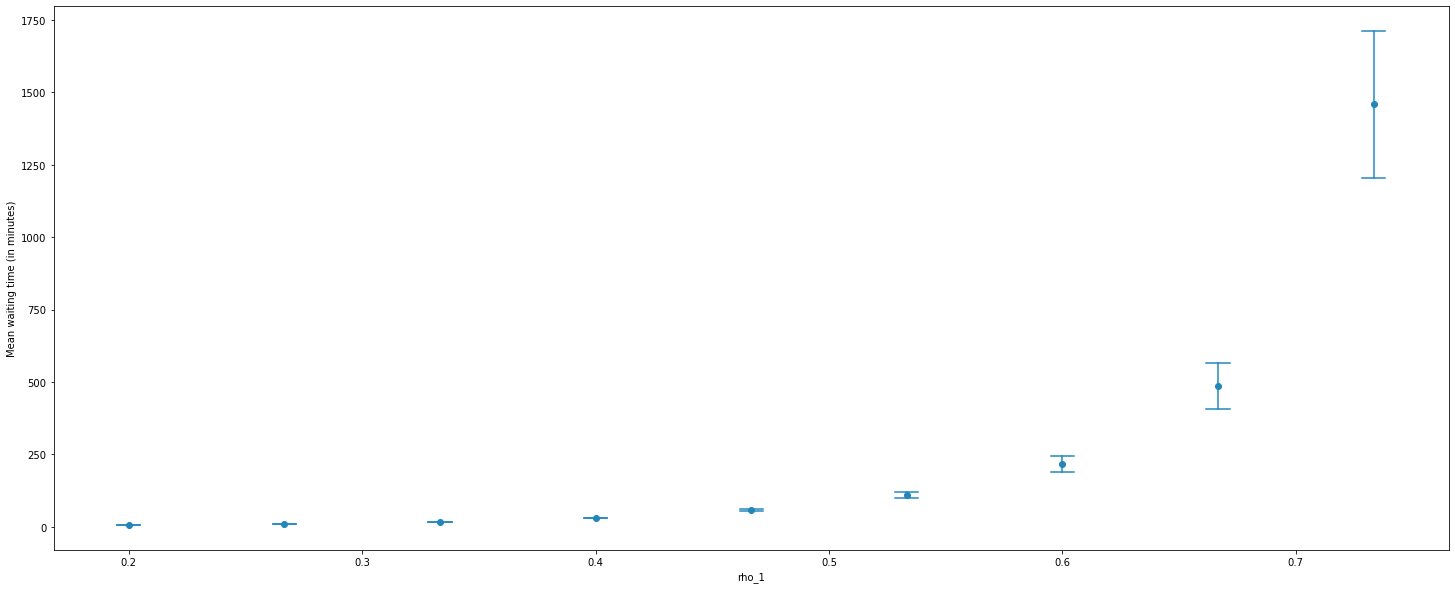

In [43]:
# show QueueTime varing rho1 = tl / tn
to = 6
plt.rcParams["figure.figsize"] = (25, 10)
for name in ["landQueueTime", "toffQueueTime"]:
	for tl in TL:
		v = [stats[name][tl,to,rep].mean for rep in REP]
		plot_confidence_interval(tl/tn, np.array(v)/60)
	# plt.title(name)
	plt.ylabel("Mean waiting time (in minutes)")
	plt.xlabel("rho_1")
	plt.show()

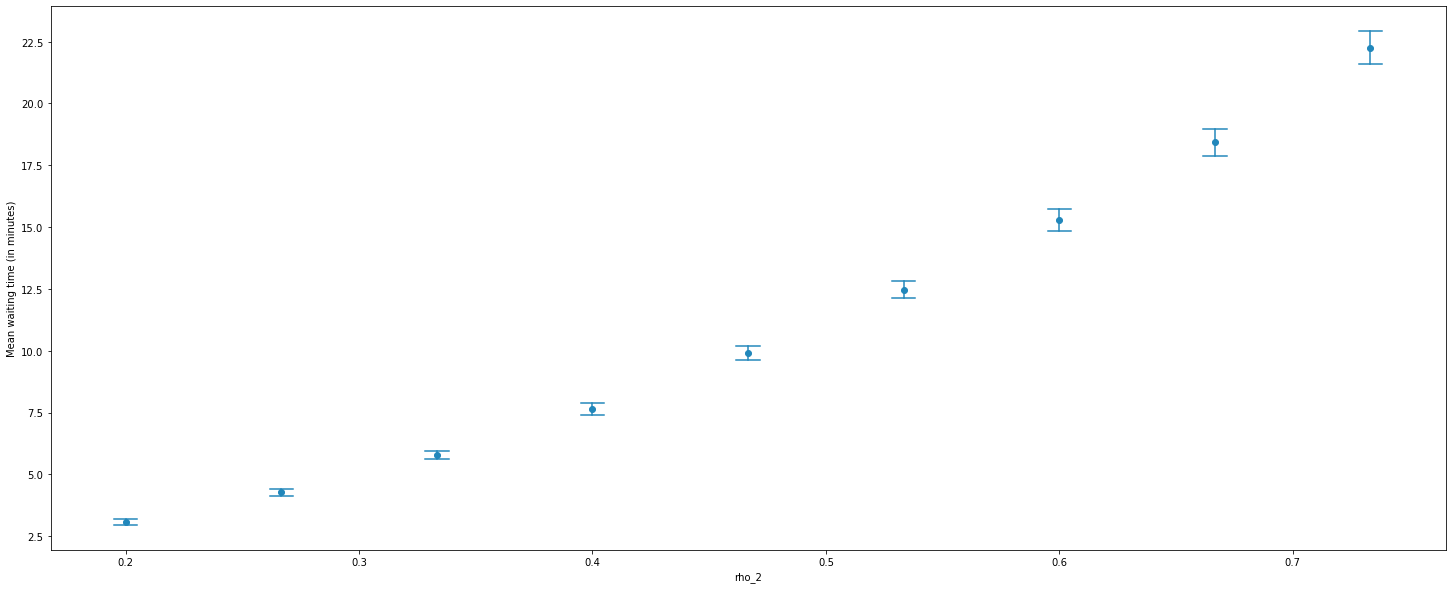

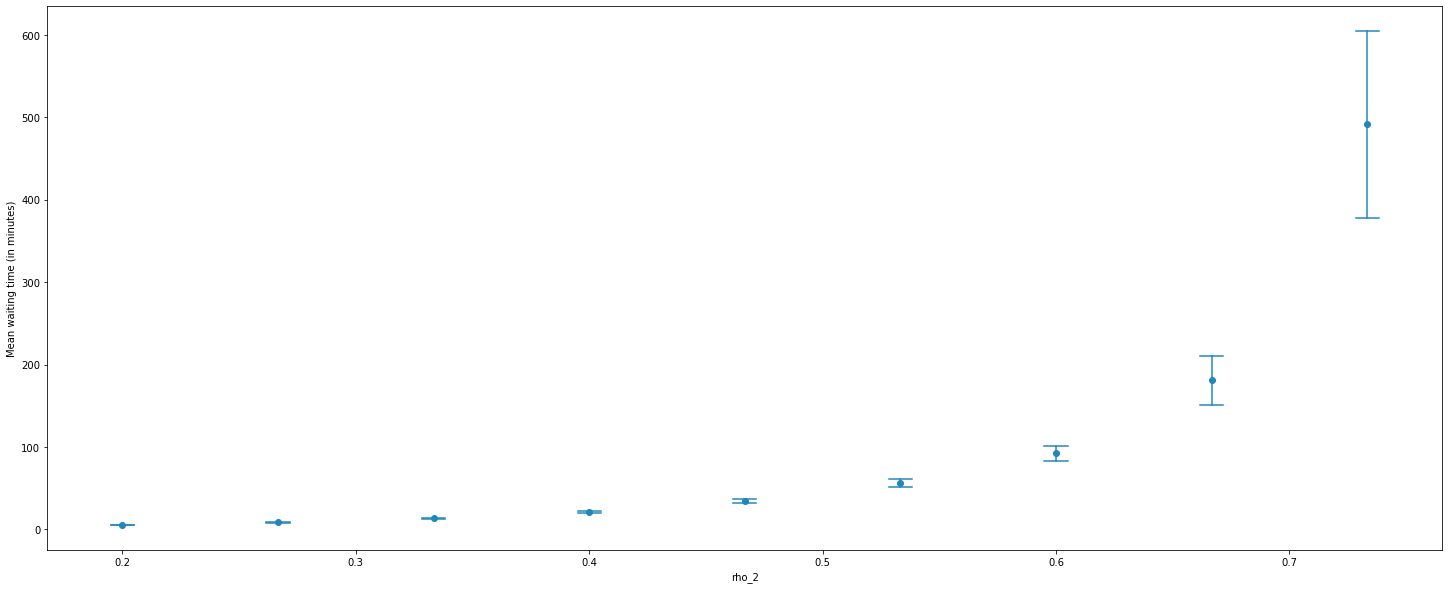

In [44]:
# show QueueTime varing rho2 = to / tn
tl = 6
for name in ["landQueueTime", "toffQueueTime"]:
	for to in TO:
		v = [stats[name][tl,to,rep].mean for rep in REP]
		plot_confidence_interval(to/tn, np.array(v)/60)
	# plt.title(name)
	plt.ylabel("Mean waiting time (in minutes)")
	plt.xlabel("rho_2")
	plt.show()